Available Expirations:
('2025-06-27', '2025-07-03', '2025-07-11', '2025-07-18', '2025-07-25', '2025-08-01', '2025-08-15', '2025-09-19', '2025-10-17', '2025-11-21', '2025-12-19', '2026-01-16', '2026-02-20', '2026-03-20', '2026-06-18', '2026-09-18', '2026-12-18', '2027-01-15', '2027-06-17', '2027-12-17')

Using expiration: 2025-07-11


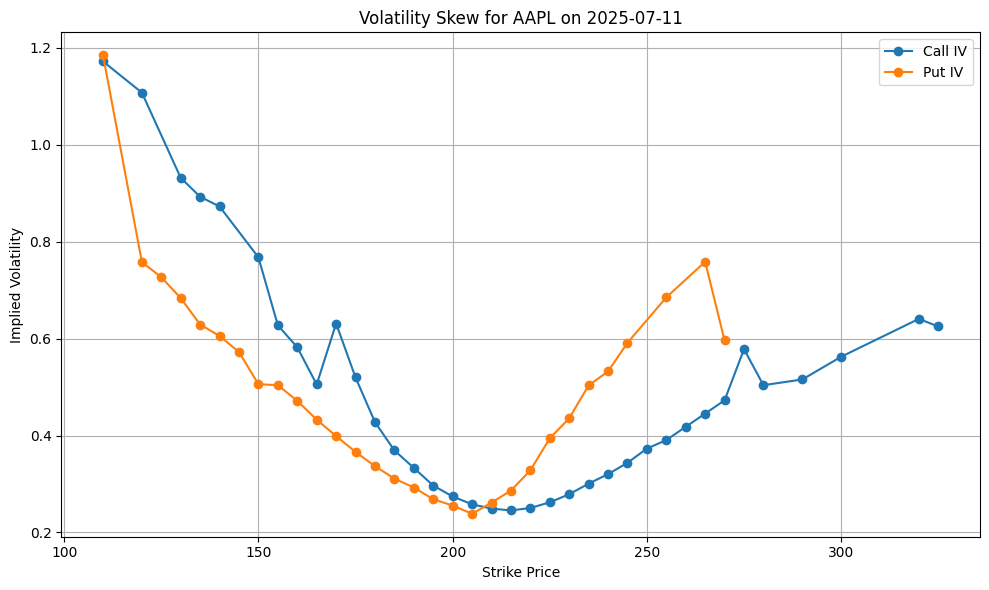

In [5]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

ticker_symbol = "AAPL" 
ticker = yf.Ticker(ticker_symbol)

expirations = ticker.options
print("Available Expirations:")
print(expirations)

expiry = expirations[2]
print(f"\nUsing expiration: {expiry}")

opt_chain = ticker.option_chain(expiry)
calls = opt_chain.calls
puts = opt_chain.puts

calls = calls[['strike', 'impliedVolatility']].copy()
puts = puts[['strike', 'impliedVolatility']].copy()

calls['type'] = 'call'
puts['type'] = 'put'
df = pd.concat([calls, puts])
df = df.dropna()

plt.figure(figsize=(10, 6))
for opt_type, color in [('call', 'blue'), ('put', 'red')]:
    subset = df[df['type'] == opt_type]
    plt.plot(subset['strike'], subset['impliedVolatility'], label=f"{opt_type.capitalize()} IV", marker='o')

plt.title(f"Volatility Skew for {ticker_symbol} on {expiry}")
plt.xlabel("Strike Price")
plt.ylabel("Implied Volatility")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()